# **KHANIF FAUZI PAMBUDI (GRADED CHALLENGE 6 PHASE 1)**

# **PROBLEMS**

Graded  Challenge  ini  dibuat  guna  mengevaluasi pembelajaran  pada  Hacktiv8  Data  Science  Fulltime Program khususnya pada konsep Model Evaluation, Model Improvement, dan Pipelines. Dataset yang digunakan dapat diakses melalui link https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study?select=general_data.csv


# **DESKRIPSI PROBLEM DATASET**

Sebuah perusahaan besar bernama XYZ, mempekerjakan, pada suatu titik waktu tertentu, sekitar 4000 karyawan. Namun, setiap tahun, sekitar 15% karyawannya meninggalkan perusahaan dan perlu diganti dengan talent pool yang tersedia di pasar kerja. Manajemen berkeyakinan bahwa tingkat atrisi ini (karyawan keluar, baik karena mereka sendiri atau karena dipecat) adalah buruk bagi perusahaan, karena alasan berikut -


1.   Proyek mantan karyawan tertunda, sehingga sulit untuk memenuhi jadwal, mengakibatkan hilangnya reputasi di antara konsumen dan mitra
2.   Departemen yang cukup besar harus dipertahankan, untuk tujuan merekrut bakat baru
Lebih sering daripada tidak, karyawan baru harus dilatih untuk pekerjaan itu dan/atau diberikan waktu untuk menyesuaikan diri dengan perusahaan

1.   Oleh karena itu, manajemen telah mengontrak perusahaan analitik SDM untuk memahami faktor-faktor apa yang harus mereka fokuskan, untuk mengurangi gesekan. 



Dengan kata lain, mereka ingin tahu perubahan apa yang harus mereka lakukan di tempat kerja mereka, agar sebagian besar karyawan mereka tetap tinggal. Juga, mereka ingin tahu variabel mana yang paling penting dan perlu segera ditangani.

Karena Anda adalah salah satu analis bintang di firma tersebut, proyek ini telah diberikan kepada Anda.

Tujuan studi kasus
Anda diminta untuk memodelkan probabilitas gesekan menggunakan regresi logistik. Hasil yang diperoleh akan digunakan oleh manajemen untuk memahami perubahan apa yang harus mereka lakukan di tempat kerja mereka, agar sebagian besar karyawan mereka tetap tinggal.

# **IMPORT LIBRARY**

In [ ]:
!pip install mglearn

In [ ]:
import pandas as pd
import numpy as np
import os
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# **DATA LOADING**

In [ ]:
df=pd.read_csv('general_data.csv')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9


# **DATA EXPLORATION**

In [ ]:
len(df)

4410

In [ ]:
df.shape

(4410, 24)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


# **MISSING VALUE**

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
df['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [ ]:
df['TotalWorkingYears'].value_counts()

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
2.0      93
14.0     93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
26.0     42
28.0     42
25.0     42
0.0      33
29.0     30
32.0     27
31.0     27
33.0     21
27.0     21
30.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [ ]:
df['TotalWorkingYears'].mode()

0    10.0
dtype: float64

In [ ]:
df['NumCompaniesWorked'].mode()

0    1.0
dtype: float64

In [ ]:
df['NumCompaniesWorked'].fillna('1.0', inplace = True) #mengisi missing value dengan nilai modus kolom NumCompaniesWorked
df['TotalWorkingYears'].fillna('10.0', inplace = True) #mengisi missing value dengan nilai modus kolom TotalWorkingYears

In [ ]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# **EDA**

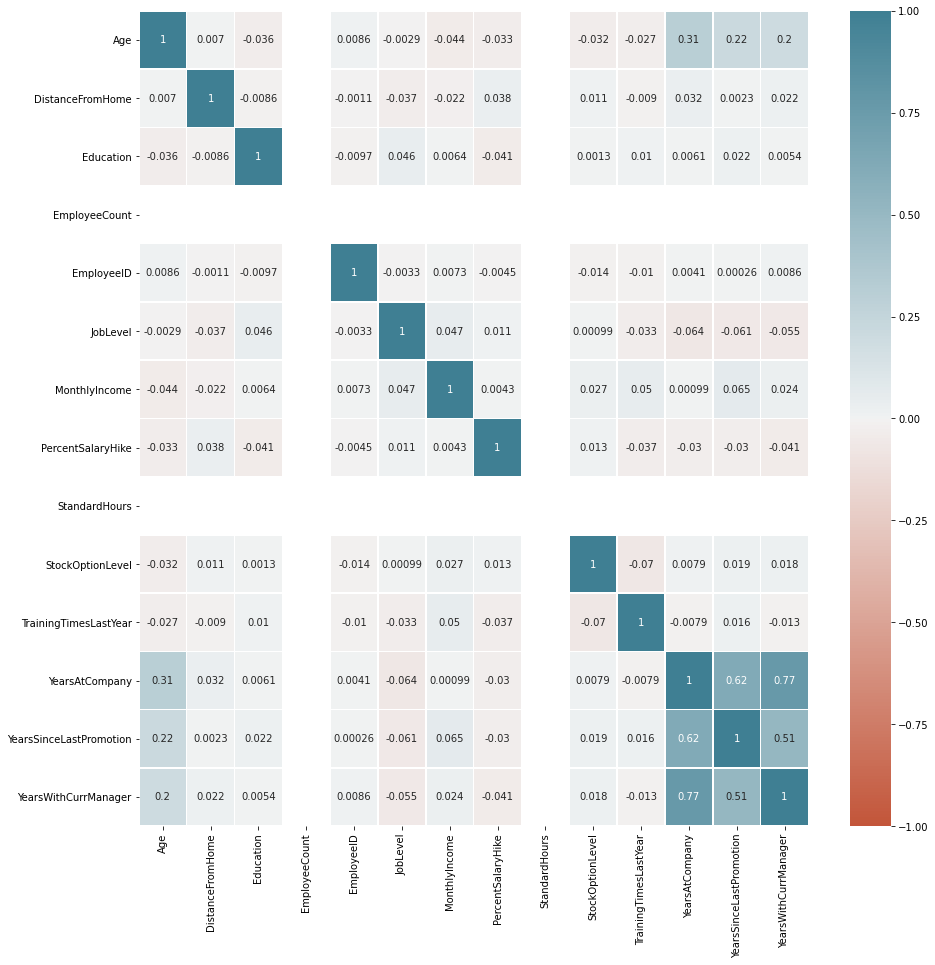

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

In [ ]:
num_dat=df[df.describe().columns.values]
cat_dat=df.drop(columns=df.describe().columns.values)

In [ ]:
num_dat.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
cat_dat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'NumCompaniesWorked', 'Over18',
       'TotalWorkingYears'],
      dtype='object')

In [ ]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [ ]:
df['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [ ]:
df['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [ ]:
num_dat.head().T

,0,1,2,3,4
Age,51,31,32,38,32
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
JobLevel,1,1,4,3,1
MonthlyIncome,131160,41890,193280,83210,23420
PercentSalaryHike,11,23,15,11,12
StandardHours,8,8,8,8,8
StockOptionLevel,0,1,3,3,2


In [ ]:
cat_dat.head().T

,0,1,2,3,4
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
Gender,Female,Female,Male,Male,Male
JobRole,Healthcare Representative,Research Scientist,Sales Executive,Human Resources,Sales Executive
MaritalStatus,Married,Single,Married,Married,Single
NumCompaniesWorked,1,0,1,3,4
Over18,Y,Y,Y,Y,Y
TotalWorkingYears,1,6,5,13,9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


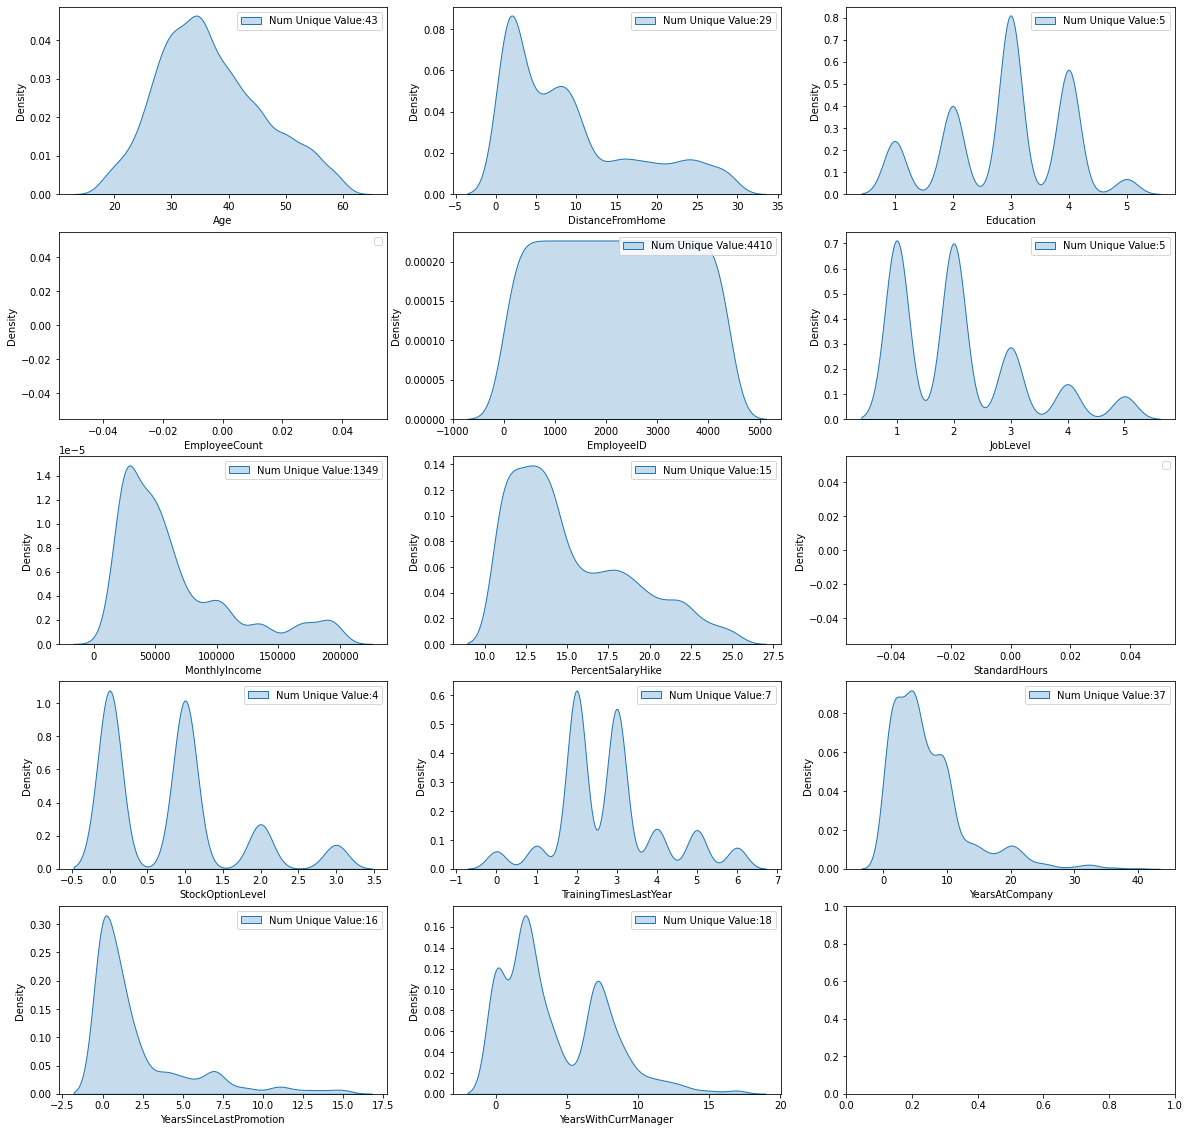

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(20,20))
i=0
j=0
for col in num_dat.columns:
    sns.kdeplot(data=num_dat, x=col, fill=True,ax=axes[i][j],label='Num Unique Value:{}'.format(len(num_dat[col].unique())))
    axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

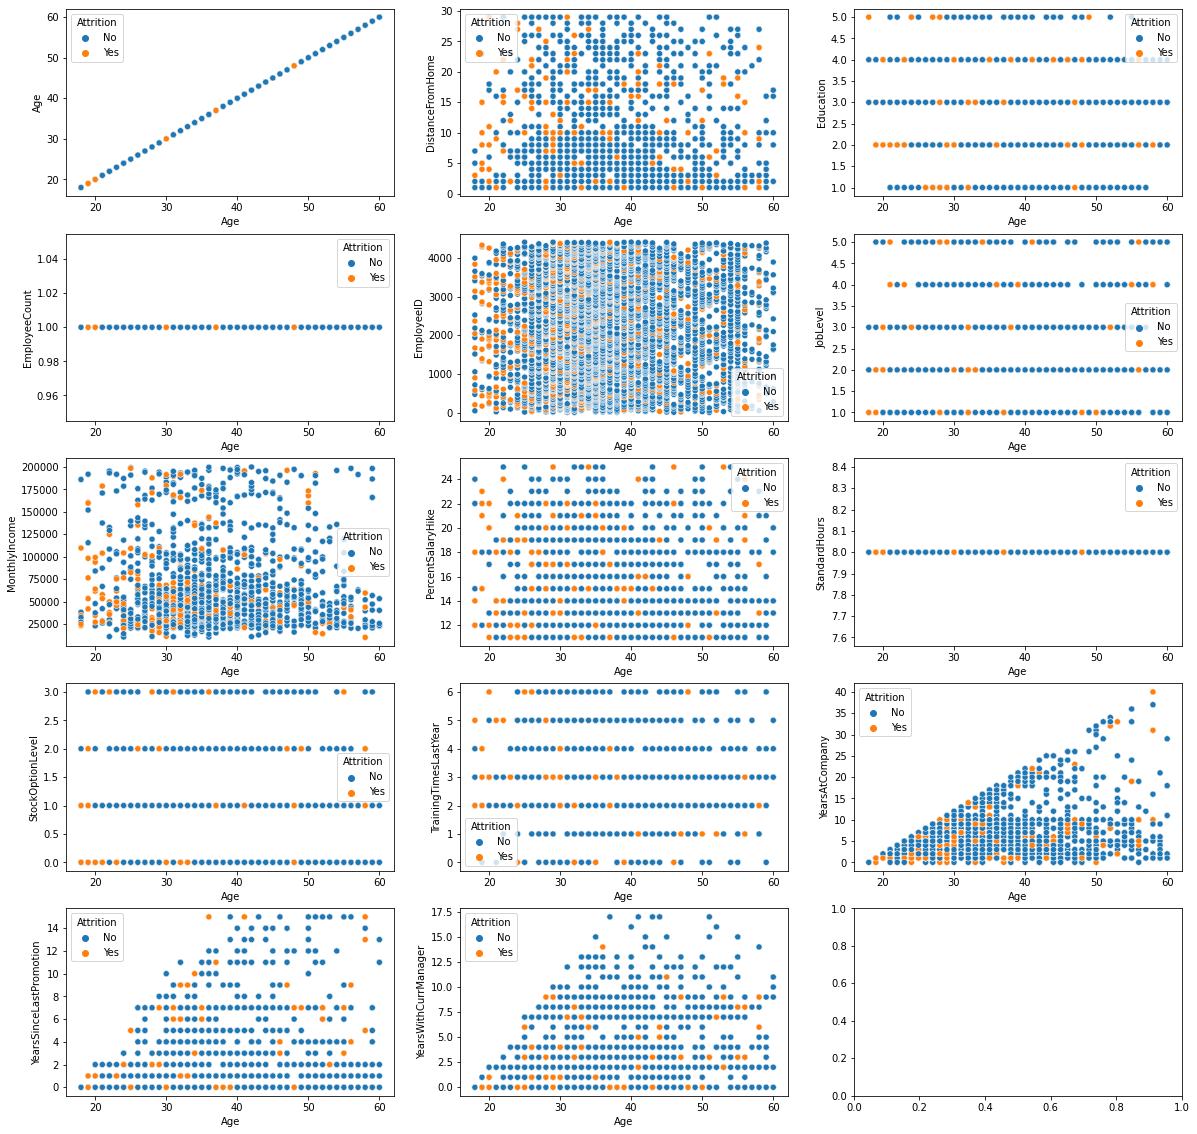

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(20,20))
i=0
j=0
for col in num_dat.columns:
    sns.scatterplot(data=df, x='Age',y=col, hue='Attrition',ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

# **EDA ANALYSIS**



*   Pada dataset yang kolomnya bertipe numerikal terdapat 2 fitur yang memiliki nilai yang sama  pada keseluruhan data yaitu data employeecount dan standardhours sehingga fitur tersebut akan didrop saat proses klasifikasi
*   Kemudian pada matriks korelasi terdapat fitur dengan tipe kategorikal yang memiliki nilai yang sama pada keseluruhan data yaitu data over18 sehingga fitur tersebut juga akan didrop saat proses klasifikasi

*   Hubungan antara kolom numerikal dan kategorikal dapat dilihat persebarannya, untuk fitur monthlyincome dapat terlihat jelas persebaran data dengan dengan target data attrition sehingga monthly income dapat dinilai sebagai fitur yang paling berpengaruh dalam hasil target data






# **TARGET DATA**

In [ ]:
df.groupby(["Attrition"]).count()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,
No,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699
Yes,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711


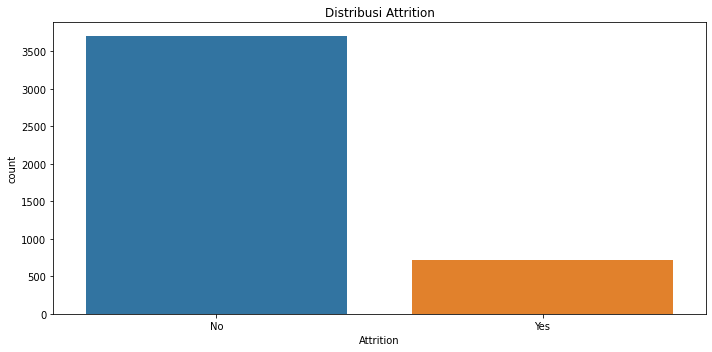

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["Attrition"],
)
plt.title("Distribusi Attrition")
plt.tight_layout()
plt.show()

# **FEATURE ENGINEERING**

In [ ]:
new_df = df.copy()

In [ ]:
#melakukan encoding terhadap fitur kategori
encode = LabelEncoder()
new_df['Attrition'] = encode.fit_transform(new_df['Attrition'])
new_df['BusinessTravel'] = encode.fit_transform(new_df['BusinessTravel'])
new_df['Department'] = encode.fit_transform(new_df['Department'])
new_df['EducationField'] = encode.fit_transform(new_df['EducationField'])
new_df['Gender'] = encode.fit_transform(new_df['Gender'])
new_df['JobRole'] = encode.fit_transform(new_df['JobRole'])
new_df['MaritalStatus'] = encode.fit_transform(new_df[ 'MaritalStatus'])
new_df['Over18'] = encode.fit_transform(new_df['Over18'])

In [ ]:
new_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,1,0,1,131160,1,0,11,8,0,1,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,1,6,2,41890,0,0,23,8,1,6,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1,0,15,8,3,5,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,3,1,1,83210,3,0,11,8,3,13,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,1,7,2,23420,4,0,12,8,2,9,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,1,6,2,60290,3,0,17,8,1,10,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,1,2,0,26790,2,0,15,8,0,10,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,2,7,1,37020,0,0,20,8,0,5,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,1,2,0,23980,0,0,14,8,1,10,2,9,7,8


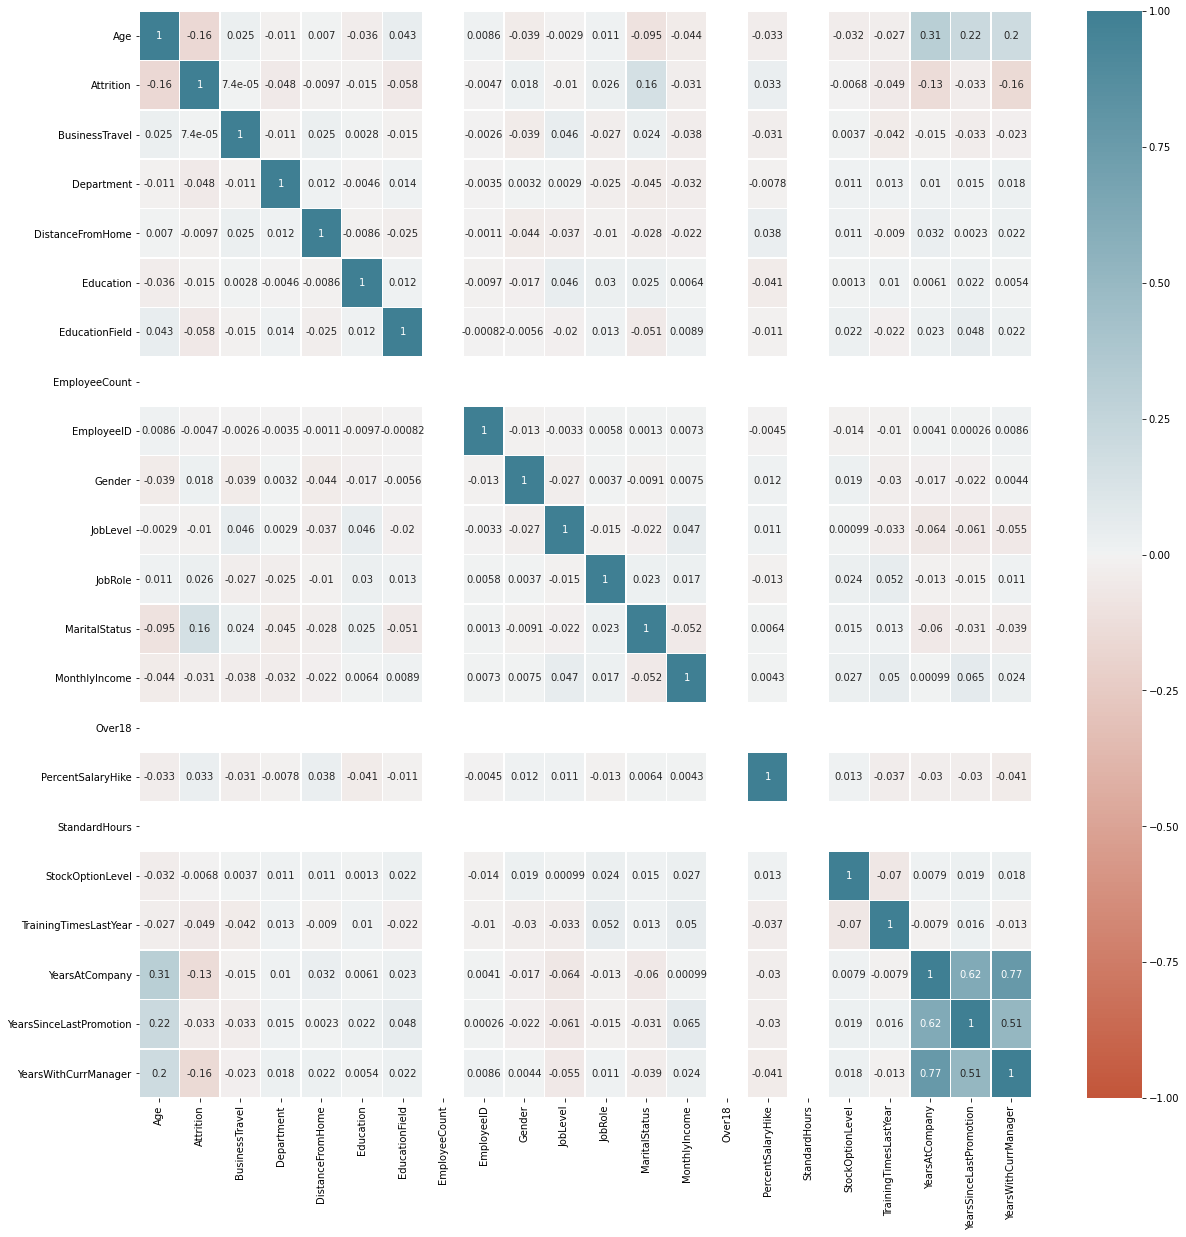

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

In [ ]:
df1 = new_df.drop(columns=["EmployeeCount","Over18","StandardHours"])

**One-Hot-Encoding (Dummy variables)**

In [ ]:
print("Original features:\n", list(df1.columns), "\n")
data_dummies = pd.get_dummies(df1)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Features after get_dummies:
 ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked_0.0', 'NumCompaniesWorked_1.0', 'NumCompaniesWorked_2.0', 'NumCompaniesWorked_3.0', 'NumCompaniesWorked_4.0', 'NumCompaniesWorked_5.0', 'NumCompaniesWorked_6.0', 'NumCompaniesWorked_7.0', 'NumCompaniesWorked_8.0', 'NumCompaniesWorked_9.0', 'NumCo

In [ ]:
display(data_dummies.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked_0.0,NumCompaniesWorked_1.0,NumCompaniesWorked_2.0,NumCompaniesWorked_3.0,NumCompaniesWorked_4.0,NumCompaniesWorked_5.0,NumCompaniesWorked_6.0,NumCompaniesWorked_7.0,NumCompaniesWorked_8.0,NumCompaniesWorked_9.0,NumCompaniesWorked_1.0,TotalWorkingYears_0.0,TotalWorkingYears_1.0,TotalWorkingYears_2.0,TotalWorkingYears_3.0,TotalWorkingYears_4.0,TotalWorkingYears_5.0,TotalWorkingYears_6.0,TotalWorkingYears_7.0,TotalWorkingYears_8.0,TotalWorkingYears_9.0,TotalWorkingYears_10.0,TotalWorkingYears_11.0,TotalWorkingYears_12.0,TotalWorkingYears_13.0,TotalWorkingYears_14.0,TotalWorkingYears_15.0,TotalWorkingYears_16.0,TotalWorkingYears_17.0,TotalWorkingYears_18.0,TotalWorkingYears_19.0,TotalWorkingYears_20.0,TotalWorkingYears_21.0,TotalWorkingYears_22.0,TotalWorkingYears_23.0,TotalWorkingYears_24.0,TotalWorkingYears_25.0,TotalWorkingYears_26.0,TotalWorkingYears_27.0,TotalWorkingYears_28.0,TotalWorkingYears_29.0,TotalWorkingYears_30.0,TotalWorkingYears_31.0,TotalWorkingYears_32.0,TotalWorkingYears_33.0,TotalWorkingYears_34.0,TotalWorkingYears_35.0,TotalWorkingYears_36.0,TotalWorkingYears_37.0,TotalWorkingYears_38.0,TotalWorkingYears_40.0,TotalWorkingYears_10.0
0,51,0,2,2,6,2,1,1,0,1,0,1,131160,11,0,6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,31,1,1,1,10,1,1,2,0,1,6,2,41890,23,1,3,5,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,32,0,1,1,17,4,4,3,1,4,7,1,193280,15,3,2,5,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,38,0,0,1,2,5,1,4,1,3,1,1,83210,11,3,5,8,7,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,32,0,2,1,10,1,3,5,1,1,7,2,23420,12,2,2,6,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = data_dummies.loc[:, 'Age':'YearsWithCurrManager']
# Extract NumPy arrays
X = features.values
y = data_dummies['NumCompaniesWorked_5.0'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (4410, 19)  y.shape: (4410,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Test score: {:.2f}".format(model.score(X_test, y_test)))

Test score: 0.99


**Numbers Encode Categoricals**

In [ ]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 3, 4, 5],
                        'Categorical Feature': ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree','Other','Human Resources']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,Life Sciences
1,1,Medical
2,2,Marketing
3,3,Technical Degree
4,4,Other
5,5,Human Resources


In [ ]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_Human Resources,Categorical Feature_Life Sciences,Categorical Feature_Marketing,Categorical Feature_Medical,Categorical Feature_Other,Categorical Feature_Technical Degree
0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0
2,2,0,0,1,0,0,0
3,3,0,0,0,0,0,1
4,4,0,0,0,0,1,0
5,5,1,0,0,0,0,0


In [ ]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Integer Feature_3,Integer Feature_4,Integer Feature_5,Categorical Feature_Human Resources,Categorical Feature_Life Sciences,Categorical Feature_Marketing,Categorical Feature_Medical,Categorical Feature_Other,Categorical Feature_Technical Degree
0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,1,1,0,0,0,0,0


**OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]


In [ ]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x1_Human Resources'
 'x1_Life Sciences' 'x1_Marketing' 'x1_Medical' 'x1_Other'
 'x1_Technical Degree']


In [ ]:
display(df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['Age', 'DistanceFromHome','Education','EmployeeID',
                                    'JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
                                    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
                                    'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']),
     ("onehot", OneHotEncoder(sparse=False), ['Attrition', 'BusinessTravel', 'Department','EducationField','Gender',
                                              'JobRole','MaritalStatus'])])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# get all columns apart from Attrition for the features
data_features = df1.drop('Attrition', axis=1)
data_features = df1
# split dataframe and Attrition
X_train, X_test, y_train, y_test = train_test_split(
    data_features, df1.Attrition, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(3307, 42)


In [ ]:
model =  RandomForestClassifier(n_estimators= 500)
model.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(model.score(X_test_trans, y_test)))

Test score: 1.00


In [ ]:
ct.named_transformers_.onehot

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

# **PIPELINES**

In [ ]:
X = df1.drop(columns = ["Attrition"])
y = df1["Attrition"]

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.2, random_state = 54)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/5, random_state = 54)
scaler = MinMaxScaler().fit(X_train)

In [ ]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)

rf = RandomForestClassifier()
# learn an RF on the scaled training data
rf.fit(X_train_scaled, y_train)
# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(rf.score(X_test_scaled, y_test)))

Test score: 0.98


In [ ]:
new_scaler = MinMaxScaler().fit(X)
new_df1 = pd.DataFrame(new_scaler.transform(X))
new_df1['Attrition'] = y
new_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Attrition
0,0.785714,1.0,1.0,0.178571,0.25,0.2,0.000000,0.0,0.00,0.000,0.5,0.637546,0.111111,0.000000,0.000000,0.025,1.000000,0.025,0.000000,0.000000,0
1,0.309524,0.5,0.5,0.321429,0.00,0.2,0.000227,0.0,0.00,0.750,1.0,0.167457,0.000000,0.857143,0.333333,0.150,0.500000,0.125,0.066667,0.235294,1
2,0.333333,0.5,0.5,0.571429,0.75,0.8,0.000454,1.0,0.75,0.875,0.5,0.964666,0.111111,0.285714,1.000000,0.125,0.333333,0.125,0.000000,0.176471,0
3,0.476190,0.0,0.5,0.035714,1.00,0.2,0.000680,1.0,0.50,0.125,0.5,0.385045,0.333333,0.000000,1.000000,0.325,0.833333,0.200,0.466667,0.294118,0
4,0.333333,1.0,0.5,0.321429,0.00,0.6,0.000907,1.0,0.00,0.875,1.0,0.070195,0.444444,0.071429,0.666667,0.225,0.333333,0.150,0.000000,0.235294,0


**Membuat Pipeline untuk Model Random Forest**

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.99


**Pipeline dengan GridsearchCV**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipegrid = make_pipeline(StandardScaler(), RandomForestClassifier(min_samples_split= [10, 50, 100, 300, 500],
                                                                  n_estimators= [10, 50, 100, 300, 500]))

In [ ]:
print("Pipeline steps:\n{}".format(pipegrid.steps))

Pipeline steps:
[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=[10, 50, 100, 300, 500],
                       min_weight_fraction_leaf=0.0,
                       n_estimators=[10, 50, 100, 300, 500], n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False))]


In [ ]:
param_grid = {'rf__min_samples_split': [10, 50, 100, 300, 500],
              'rf__n_estimators': [10, 50, 100, 300, 500]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.92
Test set score: 0.96
Best parameters: {'rf__min_samples_split': 10, 'rf__n_estimators': 300}


# **MODEL RANDOM FOREST**

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

In [ ]:
X_train.shape, X_test.shape

((3528, 20), (882, 20))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2947    0]
 [   0  581]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2947.0  581.0       1.0     3528.0        3528.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[752   0]
 [ 18 112]]
ACCURACY SCORE:
0.9796
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.976623    1.000000  0.979592    0.988312      0.980069
recall       1.000000    0.861538  0.979592    0.930769      0.979592
f1-score     0.988173    0.925620  0.979592    0.956897      0.978954
support    752.000000  130.000000  0.979592  882.000000    882.000000


# **MODEL EVALUATION**

In [ ]:
X.shape

(4410, 20)

In [ ]:
y.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[740  22]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       762
           1       0.85      1.00      0.92       120

    accuracy                           0.98       882
   macro avg       0.92      0.99      0.95       882
weighted avg       0.98      0.98      0.98       882

0.9750566893424036


**Manual Search**

In [ ]:
model_1 = RandomForestClassifier(n_estimators=300,
                                 criterion='entropy',
                                 max_features='sqrt',
                                 min_samples_leaf=10)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[734 117]
 [  6  25]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       851
           1       0.18      0.81      0.29        31

    accuracy                           0.86       882
   macro avg       0.58      0.83      0.61       882
weighted avg       0.96      0.86      0.90       882

0.8605442176870748


# **MODEL IMPROVEMENT**

**Random Search**

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [ ]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                 cv=5, random_state=46, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 450,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
rf_best_random = rf_randomcv.best_estimator_

In [ ]:
y_pred = rf_best_random.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[740  26]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       766
           1       0.82      1.00      0.90       116

    accuracy                           0.97       882
   macro avg       0.91      0.98      0.94       882
weighted avg       0.98      0.97      0.97       882

0.9705215419501134


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid) 

{'criterion': ['entropy'], 'max_depth': [450], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [200, 300, 400, 500, 600]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 22.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=450, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[740  30]
 [  0 112]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       770
           1       0.79      1.00      0.88       112

    accuracy                           0.97       882
   macro avg       0.89      0.98      0.93       882
weighted avg       0.97      0.97      0.97       882

0.9659863945578231


# **ADDITIONAL MODEL EVALUATION**

**Parameter Tuning Based on Bayesian Optimization**

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [ ]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [ ]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x7f2852fd0510>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f2852fd0210>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7f2852fd0710>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f2852fd0e10>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7f2852fd0c50>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7f2852fd01d0>}

In [ ]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # tujuan ingin memaksimalkan akurasi, sehingga meminimumkan negatif akurasi
    return {'loss': -1*accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=80,
            trials=trials)
best

100%|██████████| 80/80 [11:26<00:00,  8.58s/it, best loss: -0.8387189841882143]


{'criterion': 0,
 'max_depth': 330.0,
 'max_features': 3,
 'min_samples_leaf': 0.48023983880464854,
 'min_samples_split': 0.5129891012883049,
 'n_estimators': 6}

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
None
1500


In [ ]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
y_pred = trainedforest.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[740 142]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       882
           1       0.00      0.00      0.00         0

    accuracy                           0.84       882
   macro avg       0.50      0.42      0.46       882
weighted avg       1.00      0.84      0.91       882

0.8390022675736961


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **MODEL INFERENCE**

**Manual Search**

In [ ]:
y_pred = model_1.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[734 117]
 [  6  25]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       851
           1       0.18      0.81      0.29        31

    accuracy                           0.86       882
   macro avg       0.58      0.83      0.61       882
weighted avg       0.96      0.86      0.90       882

0.8605442176870748


**Random Search**

In [ ]:
y_pred = rf_best_random.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[740  26]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       766
           1       0.82      1.00      0.90       116

    accuracy                           0.97       882
   macro avg       0.91      0.98      0.94       882
weighted avg       0.98      0.97      0.97       882

0.9705215419501134


**Grid Search**

In [ ]:
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[740  30]
 [  0 112]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       770
           1       0.79      1.00      0.88       112

    accuracy                           0.97       882
   macro avg       0.89      0.98      0.93       882
weighted avg       0.97      0.97      0.97       882

0.9659863945578231


**Bayesian Optimization**

In [ ]:
y_pred = trainedforest.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[740 142]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       882
           1       0.00      0.00      0.00         0

    accuracy                           0.84       882
   macro avg       0.50      0.42      0.46       882
weighted avg       1.00      0.84      0.91       882

0.8390022675736961


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **MODEL ANALYSIS**

Pada percobaan model menggunakan dataset HR Analytics Case Study General Data dapat disimpulkan hasil analisa sebagai berikut


*   Model yang digunakan adalah model random forest
*   Pada proses pengolahan data train dan test dilakukan pengolahan dengan model evaluation dan model improvement

*   Saat melakukan model evaluation hasilnya akurasinya 0.8605 hal ini disebabkan persebaran data yang tidak merata sehingga salah satu kelas tidak terklasifikasi dengan baik akibatnya nilai precision, recall, dan f1-score nya rendah yang menyebabkan hasil akurasi secara keseluruhan tidak maksimal
*   Kemudian dilakukan model improvement untuk mencari hasil klasifikasi yang baik antara dua kelas. Untuk metode nya menggunakan random search dan grid search

*   pada model improvement akan dicari parameter terbaik untuk menghasilkan nilai akurasi yang lebih baik



*   Pada metode random search menghasilkan hasil yang lebih baik yaitu 0.9705 dan menghasilkan kenaikan angka akurasi pada precision, recall, dan f-1 score untuk kelas yang persebarannya sedikit
*   Pada metode grid search menghasilkan hasil yang lebih baik juga yaitu 0.9659 namun tidak lebih baik dari metode random search. Selain itu proses running time pada metode grid search lebih lama dibandingkan dengan random search



*   Pada proses model improvement metode random search menghasilkan hasil yang lebih baik diantara metode yang lain





# **OVERALL ANALYSIS**

Pada percobaan model menggunakan dataset HR Analytics Case Study General Data dapat disimpulkan hasil analisa sebagai berikut


*   Proses Feature Engineering dapat menghasilkan sebuat feature baru yang dapat memetakan persebaran feature data ke target data agar dapat menghasilkan tingkat akurasi yang lebih baik
*   Pipeline dapat digunakan untuk menghasilkan data test dan data prediksi yang lebih baik karena pembagian split data dapat diatur sesuai dengan panjang pipeline yang di set

*   Pada  percobaan kali ini model yang digunakan adalah model random forest karena model ini dikenal lebih baik dari model-model lain untuk menanggulangi persebaran data yang tidak merata
*   Pada model evaluasi dilakukan juga model improvement untuk menghasilkan nilai model yang baik. 

*   Untuk model evaluasi menggunakan manual search yang parameter prediksinya sudah ditentukan diawal
*   Untuk model improvement menggunakan random search dan grid search



*   Pada proses model improvement metode random search menghasilkan hasil yang lebih baik diantara metode yang lain
